# Homework-3

In [1]:
import pandas as pd
import numpy as np
filepath="C:/Users/harsha/Desktop/DataMining_733/Homework3/SP500_close_price_no_missing.csv"
df_sp500_close_no_missing=pd.read_csv(filepath)

shape=df_sp500_close_no_missing.shape
print("Shape of the dataset: ",shape)

Shape of the dataset:  (1043, 472)


In [2]:
df_sp500_close_no_missing.head()

,date,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
0,2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
1,2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2,2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
3,2011-01-06,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
4,2011-01-07,86.23,61.26,48.37,53.57,32.04,8.83,12.99,32.16,55.85,...,29.83,118.73,23.71,11.30,29.97,22.12,16.90,49.52,52.59,24.57


In [3]:
df_sp500_close_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Columns: 472 entries, date to ZION
dtypes: float64(471), object(1)
memory usage: 3.8+ MB


In [4]:
df_sp500_close_no_missing.dtypes

date     object
MMM     float64
ACE     float64
ABT     float64
ANF     float64
         ...   
XL      float64
YHOO    float64
YUM     float64
ZMH     float64
ZION    float64
Length: 472, dtype: object

In [5]:
#In the above lines of code date is being considered as an object datatype so I am converting it into date datatype to avaoid confusion in the further implementation of the code


In [6]:
ddf_sp500_close_no_missing= df_sp500_close_no_missing.convert_dtypes()
df_sp500_close_no_missing['date']= pd.to_datetime(df_sp500_close_no_missing['date'])
df_sp500_close_no_missing.reset_index(inplace=True)
df_sp500_close_no_missing.dtypes

index             int64
date     datetime64[ns]
MMM             float64
ACE             float64
ABT             float64
              ...      
XL              float64
YHOO            float64
YUM             float64
ZMH             float64
ZION            float64
Length: 473, dtype: object

In [7]:
#Now reading the rest of the stocks which were not listed because if the error or not getting listed as of Jan,1 2011 

In [13]:
import pandas as pd

filepath_ticker = 'C:/Users/harsha/Desktop/DataMining_733/Homework3/SP500_ticker.csv'
df_sp500_ticker = pd.read_csv(filepath_ticker, encoding='latin1')  # or encoding='ISO-8859-1'
shape_ticker = df_sp500_ticker.shape
print("Shape of the dataset: ", shape_ticker)


Shape of the dataset:  (500, 3)


In [14]:
df_sp500_ticker.head()

,ticker,company_name,sector
0,MMM,3M Co.,Industrials
1,ACE,ACE Limited,Financials
2,ABT,Abbott Laboratories,Health Care
3,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ADBE,Adobe Systems Inc,Information Technology


In [15]:
df_sp500_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        500 non-null    object
 1   company_name  500 non-null    object
 2   sector        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


# Problem-1

# a) Fit a PCA model to log returns

# 1.	Derive log returns from the raw stock price dataset

In [17]:

# Extracting numeric columns (excluding 'date')
numeric_columns = df_sp500_close_no_missing.drop('date', axis=1)

# Calculate log returns
log_returns = np.log(numeric_columns / numeric_columns.shift(1))

# Replace any potential inf or -inf values with NaN
log_returns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the first few rows of log returns
print(log_returns.head())


      index       MMM       ACE       ABT       ANF      ADBE       AMD  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2  0.693147  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
3  0.405465 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
4  0.287682  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   

        AES       AET       AFL  ...       WYN      WYNN       XEL       XRX  \
0       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
1  0.004773  0.005141 -0.018417  ... -0.006214  0.030719  0.004235 -0.026830   
2  0.013402  0.009569 -0.001949  ... -0.003286  0.012819 -0.005935  0.005249   
3  0.017081  0.018557 -0.005514  ... -0.014589  0.007264 -0.000851  0.000000   
4  0.000000  0.002179 -0.003931  ... -0.003681  0.034794  0.008896 -0.014060   

       XLNX        XL      YHOO       YUM       ZMH      ZION  
0   

# 2. Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.

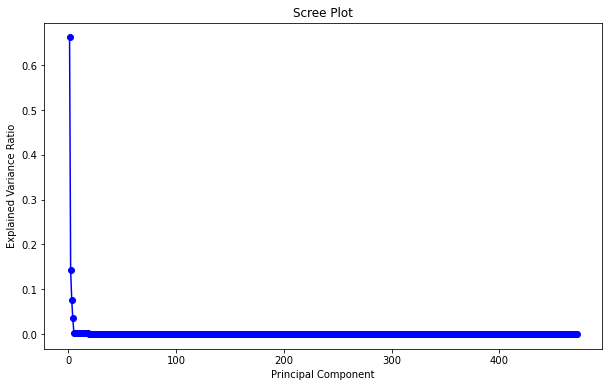

In [18]:
import matplotlib.pyplot as plt

# Assuming principal_components is the result of our PCA analysis

# Fit PCA model
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(log_returns.dropna())

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


# 3. Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction (i.e. the horizontal axis will show the number of components kept, the vertical axis will show the cumulative percentage of variance retained).

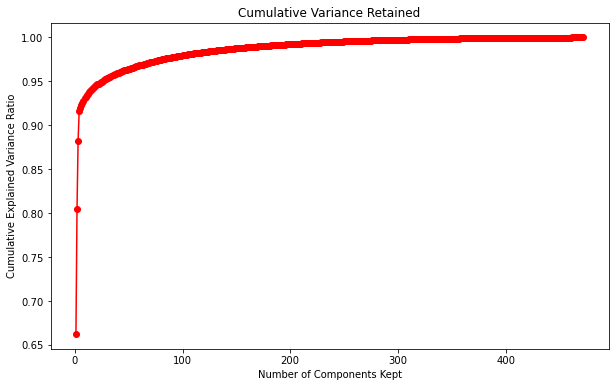

In [19]:
import matplotlib.pyplot as plt


# Assuming principal_components is the result of our PCA analysis

# Fit PCA model
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(log_returns.dropna())

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative variance retained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components Kept')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


# 4. How many principal components must be retained in order to capture at least 80% of the total variance in data?

In [20]:
# Assuming cumulative_explained_variance is the cumulative explained variance obtained from your PCA analysis

# Set the threshold for the minimum variance retained (e.g., 80%)
variance_threshold = 0.8

# Find the number of components needed to reach or exceed the threshold
num_components_needed = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

print(f'Number of components needed to retain at least {variance_threshold * 100}% of variance: {num_components_needed}')


Number of components needed to retain at least 80.0% of variance: 2


# b)	Analysis of principal components and weights 

# 1.	Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior. 

In [41]:
import matplotlib.pyplot as plt





In [35]:
#cheking missing values
print(log_returns.isnull().sum())


index    0
MMM      0
ACE      0
ABT      0
ANF      0
        ..
XL       0
YHOO     0
YUM      0
ZMH      0
ZION     0
Length: 472, dtype: int64


In [36]:
#checking for infinity or large values
print(np.isfinite(log_returns).all())
print((log_returns < np.finfo(np.float64).max).all())


index    True
MMM      True
ACE      True
ABT      True
ANF      True
         ... 
XL       True
YHOO     True
YUM      True
ZMH      True
ZION     True
Length: 472, dtype: bool
index    True
MMM      True
ACE      True
ABT      True
ANF      True
         ... 
XL       True
YHOO     True
YUM      True
ZMH      True
ZION     True
Length: 472, dtype: bool


In [37]:
#removing missing or null values
log_returns = log_returns.dropna()  # Remove rows with missing values


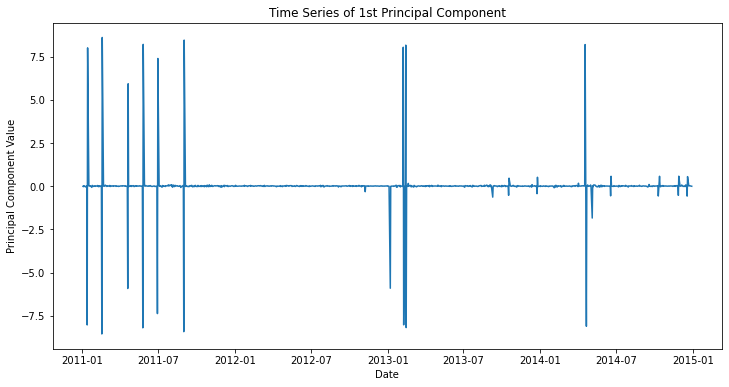

In [42]:
# Assuming principal_components is your array of principal components
# Extract the 1st principal component
pc1 = principal_components[:, 0]

# Check the dimensions and trim if necessary
df_sp500_close_no_missing['date'] = pd.to_datetime(df_sp500_close_no_missing['date'])
pc1_dates = df_sp500_close_no_missing['date'][:len(pc1)]

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(pc1_dates, pc1)
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.show()


In [40]:
# Identify the date with the lowest value
min_pc1_date = pc1_dates[np.argmin(pc1)]
print(f'Date with the lowest value for the 1st principal component: {min_pc1_date}')



Date with the lowest value for the 1st principal component: 2011-02-17 00:00:00


# 2.	Extract the weights from the PCA model for 1st and 2nd principal components. 

In [43]:

# Extract weights for the 1st and 2nd principal components
weights_1st_pc = pca.components_[0]
weights_2nd_pc = pca.components_[1]

# Display the extracted weights
print("Weights for the 1st Principal Component:")
print(weights_1st_pc)

print("\nWeights for the 2nd Principal Component:")
print(weights_2nd_pc)


Weights for the 1st Principal Component:
[-6.52958219e-05 -2.53387429e-04 -4.24236405e-04  7.08630000e-05
 -2.84353638e-04 -5.72742531e-04  4.76103186e-05 -3.91482729e-04
 -4.58516379e-04 -6.22971645e-04 -9.66593019e-04 -1.89841894e-04
 -1.46157149e-04 -1.15272668e-03 -1.72101978e-04 -4.69836070e-04
 -6.97035033e-04  8.32321894e-04 -2.84547331e-04 -3.45611309e-04
  2.36186756e-04  5.60980905e-06 -6.04004658e-04  1.87934093e-04
 -3.60562250e-04 -8.37261638e-04 -1.43220004e-04 -5.86378728e-04
  7.50636633e-05  4.96997184e-04 -9.87677906e-05 -2.94175219e-04
 -6.47699090e-05 -1.48635132e-04 -7.82849938e-04  3.27634262e-04
  1.33994281e-03  3.81755454e-04 -5.37735250e-04 -1.64836614e-04
 -1.07097001e-03  5.44785721e-05  1.24784502e-04 -1.18709351e-04
 -2.47603632e-04 -2.02252044e-04  2.30106103e-04 -9.28029544e-05
 -1.63860226e-03 -5.88323867e-04 -1.89188616e-04 -7.00963639e-04
 -6.55289355e-04  6.86455810e-05 -1.94796859e-04 -3.93556165e-04
 -7.39503061e-05 -4.63155720e-04 -1.60237735e-04 

In [48]:
# Assuming pca is your fitted PCA model
# Extract weights for the 1st and 2nd principal components
weights_1st_pc = pca.components_[0]
weights_2nd_pc = pca.components_[1]

# Display the extracted weights
print("Weights for the 1st Principal Component:")
print(weights_1st_pc)



Weights for the 1st Principal Component:
[-6.52958219e-05 -2.53387429e-04 -4.24236405e-04  7.08630000e-05
 -2.84353638e-04 -5.72742531e-04  4.76103186e-05 -3.91482729e-04
 -4.58516379e-04 -6.22971645e-04 -9.66593019e-04 -1.89841894e-04
 -1.46157149e-04 -1.15272668e-03 -1.72101978e-04 -4.69836070e-04
 -6.97035033e-04  8.32321894e-04 -2.84547331e-04 -3.45611309e-04
  2.36186756e-04  5.60980905e-06 -6.04004658e-04  1.87934093e-04
 -3.60562250e-04 -8.37261638e-04 -1.43220004e-04 -5.86378728e-04
  7.50636633e-05  4.96997184e-04 -9.87677906e-05 -2.94175219e-04
 -6.47699090e-05 -1.48635132e-04 -7.82849938e-04  3.27634262e-04
  1.33994281e-03  3.81755454e-04 -5.37735250e-04 -1.64836614e-04
 -1.07097001e-03  5.44785721e-05  1.24784502e-04 -1.18709351e-04
 -2.47603632e-04 -2.02252044e-04  2.30106103e-04 -9.28029544e-05
 -1.63860226e-03 -5.88323867e-04 -1.89188616e-04 -7.00963639e-04
 -6.55289355e-04  6.86455810e-05 -1.94796859e-04 -3.93556165e-04
 -7.39503061e-05 -4.63155720e-04 -1.60237735e-04 

In [46]:

print("\nWeights for the 2nd Principal Component:")
print(weights_2nd_pc)


Weights for the 2nd Principal Component:
[ 1.39897717e-04 -4.99439736e-04 -9.12127066e-04 -7.55719896e-05
  1.85040472e-04 -1.87631627e-04  5.64087040e-04  1.29482902e-04
 -3.24393792e-04 -1.43050320e-03  4.17158984e-04 -2.87004783e-04
  1.98560628e-05  1.87661885e-03 -4.01261219e-04  1.20454575e-03
 -9.51730711e-04 -2.03716495e-03 -6.92138702e-04  2.04489795e-04
 -5.80324853e-04  7.34977761e-04 -8.25595533e-04 -5.80570432e-05
 -7.65748390e-04 -5.47418667e-04 -1.01539588e-03 -5.84230535e-05
 -3.45619246e-04 -7.80805550e-04  1.95423572e-05  7.42949914e-04
 -8.00260531e-04 -1.63476073e-04  6.72227622e-04 -1.31090439e-03
 -1.52565408e-03  4.30865147e-04 -6.38943190e-04  1.25868661e-04
  2.37319330e-04 -1.02600826e-03  1.09326526e-04 -1.11741001e-03
 -6.84699561e-04  7.66143898e-05 -8.68949456e-04 -1.26443744e-03
  1.95651754e-03  6.11488428e-04 -4.20186793e-04 -9.15580811e-04
 -2.84875850e-04 -1.18187487e-03  7.32880646e-05 -3.60669431e-04
 -6.66358212e-04 -5.98510942e-05 -1.67351170e-04

# 3. Create a plot to show weights of the 1st principal component grouped by the industry sector (for example, you may draw a bar plot of mean weight per sector). Observe the distribution of weights (magnitudes, signs). Based on your observation, what kind of information do you think the 1st principal component might have captured?

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_sp500_ticker contains the ticker information, including the 'sector' column
# Assuming pca is your fitted PCA model

# Extract weights for the 1st principal component
weights_1st_pc = pca.components_[0]

# Create a DataFrame with tickers and corresponding weights for the 1st principal component
tickers = df_sp500_ticker['ticker'].values

# Ensure lengths match or adjust to the minimum length
min_length = min(len(tickers), len(weights_1st_pc))
df_weights_1st_pc = pd.DataFrame({'Ticker': tickers[:min_length], 'Weight_1st_PC': weights_1st_pc[:min_length]})

# Merge with sector information
df_weights_sector = pd.merge(df_weights_1st_pc, df_sp500_ticker[['ticker', 'sector']], left_on='Ticker', right_on='ticker', how='left')

# Group by sector and calculate the mean weight for the 1st principal component
mean_weights_by_sector = df_weights_sector.groupby('sector')['Weight_1st_PC'].mean()

# Plot bar plot
#plt.figure(figsize=(12, 6))
#mean_weights_by_sector.plot(kind='bar', color=np.where(mean_weights_by_sector > 0, 'b', 'r'))
#plt.title('Mean Weights of the 1st Principal Component by Sector')
#plt.xlabel('Industry Sector')
#plt.ylabel('Mean Weight')
#plt.show()


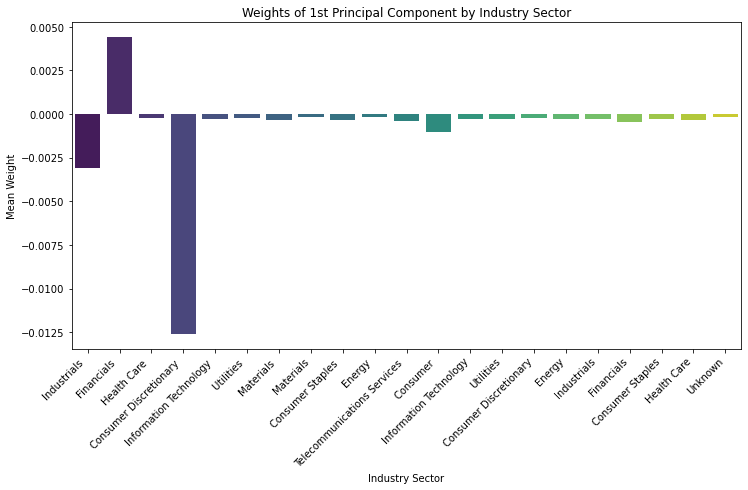

In [62]:
import seaborn as sns
# Ensure the lengths match by considering only the relevant rows in df_sp500_ticker
df_weights_pc1 = pd.DataFrame({'Sector': df_sp500_ticker['sector'].iloc[:len(weights_1st_pc)], 'Weight_PC1': weights_1st_pc})

# Plot weights of the 1st principal component grouped by industry sector using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='Weight_PC1', data=df_weights_pc1, ci=None, palette='viridis')
plt.title('Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# 4. Make a similar plot for the 2nd principal component.  What kind of information do you think does this component reveal? (Hint: look at the signs and magnitudes.)


In [70]:
df_sp500_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        500 non-null    object
 1   company_name  500 non-null    object
 2   sector        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


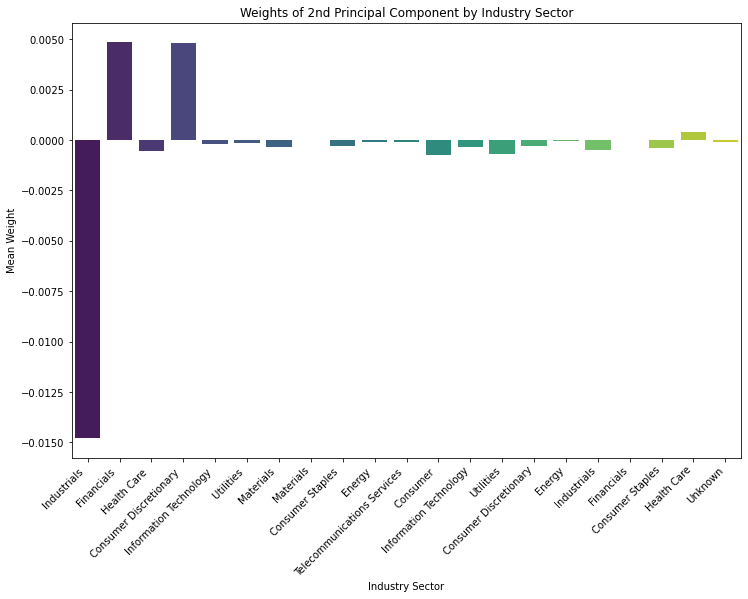

In [74]:
# Assuming df_sp500_ticker contains the ticker information, including the 'sector' column
# Assuming pca is your fitted PCA model

# Extract weights for the 2nd principal component
weights_2nd_pc = pca.components_[1]

# Ensure lengths match or adjust to the minimum length
min_length = min(len(tickers), len(weights_2nd_pc))
df_weights_2nd_pc = pd.DataFrame({'Ticker': tickers[:min_length], 'Weight_2nd_PC': weights_2nd_pc[:min_length]})

# Merge with sector information
df_weights_sector_2nd_pc = pd.merge(df_weights_2nd_pc, df_sp500_ticker[['ticker', 'sector']], left_on='Ticker', right_on='ticker', how='left')

# Group by sector and calculate the mean weight for the 2nd principal component
mean_weights_by_sector_2nd_pc = df_weights_sector_2nd_pc.groupby('sector')['Weight_2nd_PC'].mean()

# Plot weights of the 2nd principal component grouped by industry sector using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='sector', y='Weight_2nd_PC', data=df_weights_sector_2nd_pc, ci=None, palette='viridis')
plt.title('Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# 5. Suppose we wanted to construct a new stock index using one principal component to track the overall market tendencies. Which of the two components would you prefer to use for this purpose, the 1st or the 2nd? Why?

-> In this the 1st Principal Component represents the dominant trend in stock returns, it explains the maximum variance among all the components which are suitable for reflecting market wide components and trends

-> Coming to the 2nd Principal component, capturing independent variance adds the diversification by capturing sector specific movements. This also represents additional, uncorrelated information

-> The 1st principal compoment if preferred for closely tracking overall market tendencies, whereas the 2nd principal component is considered for diversification and capturing independent movements. 

In [ ]:
#Bonus

In [76]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=5b917eee6aa08c49725c5f1750fd6872ff38effb90b0517a328d083064319636
  Stored in directory: c:\users\harsha\appdata\local\pip\cache\wheels\77\6b\dc\722aee2a5d46a021ab67564c9d3d5536c3bd9577fcdc3a5aeb
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6

In [77]:
import yfinance as yf
import pandas as pd

# Define the list of tickers you're interested in
tickers = ['AAPL', 'GOOGL', 'MSFT']  # Add more if needed

# Fetch historical stock prices
df_stock_prices = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# Print the first few rows of the data
print(df_stock_prices.head())

# Now you can proceed with the PCA analysis using the fetched data


[*********************100%%**********************]  3 of 3 completed
                  AAPL       GOOGL        MSFT
Date                                          
2022-01-03  179.953888  144.991501  328.727661
2022-01-04  177.669998  144.399506  323.090942
2022-01-05  172.943970  137.774994  310.688141
2022-01-06  170.056976  137.747498  308.233154
2022-01-07  170.225052  137.016998  308.390228


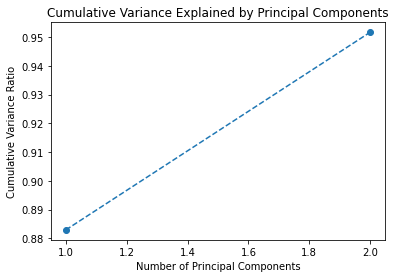

In [82]:
# Define the number of principal components you want to retain
n_components = 2  # Adjust this value as needed

# Assuming df_stock_prices contains the stock prices
log_returns = np.log(df_stock_prices / df_stock_prices.shift(1)).dropna()
standardized_returns = (log_returns - log_returns.mean()) / log_returns.std()
from sklearn.decomposition import PCA

# Instantiate PCA with the specified number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(standardized_returns)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


# Problem -2

In [84]:
#Reading the bmi.csv file an dloading the dataset
filepath_bmi="C:/Users/harsha/Desktop/DataMining_733/Homework3/BMI.csv"
df_bmi=pd.read_csv(filepath_bmi)
#checking the shape of the dataset
shape=df_bmi.shape
print("Shape of the dataset: ",shape)

Shape of the dataset:  (252, 14)


In [85]:
df_bmi.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


In [86]:
# Display information about the dataset
print(df_bmi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   Height   252 non-null    float64
 3   Neck     252 non-null    float64
 4   Chest    252 non-null    float64
 5   Abdomen  252 non-null    float64
 6   Hip      252 non-null    float64
 7   Thigh    252 non-null    float64
 8   Knee     252 non-null    float64
 9   Ankle    252 non-null    float64
 10  Biceps   252 non-null    float64
 11  Forearm  252 non-null    float64
 12  Wrist    252 non-null    float64
 13  fatpctg  252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB
None


In [87]:
# Check for missing values
print(df_bmi.isnull().sum())

Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
fatpctg    0
dtype: int64


In [88]:
# Summary statistics
print(df_bmi.describe())

              Age      Weight      Height        Neck       Chest     Abdomen  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    44.884921  181.497619   73.430159   37.992063  100.824206   92.555952   
std     12.602040   30.438150    5.989882    2.430913    8.430476   10.783077   
min     22.000000  116.000000   31.600000   31.100000   79.300000   69.400000   
25%     35.750000  161.550000   69.675000   36.400000   94.350000   84.575000   
50%     43.000000  178.400000   73.400000   38.000000   99.650000   90.950000   
75%     54.000000  199.775000   77.350000   39.425000  105.375000   99.325000   
max     81.000000  366.100000   89.400000   51.200000  136.200000  148.100000   

              Hip       Thigh        Knee       Ankle      Biceps     Forearm  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    99.904762   59.405952   38.590476   23.102381   32.273413   28.663889   
std      7.164058    5.2499

In [90]:
# Assuming all columns except 'fatpctg' are features
X = df_bmi.drop('fatpctg', axis=1)

# Target variable
y = df_bmi['fatpctg']

In [91]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 19.551365613094585
R-squared: 0.6405671274360322


In [95]:
pip install mlxtend


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Split the data into features (X) and target variable (y)
X = df_bmi.drop("fatpctg", axis=1)
y = df_bmi["fatpctg"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Forward stepwise feature selection
sfs_forward = SFS(model, k_features='best', forward=True, scoring='neg_mean_squared_error', cv=5)
sfs_forward.fit(X_train, y_train)

# Backward stepwise feature selection
sfs_backward = SFS(model, k_features='best', forward=False, scoring='neg_mean_squared_error', cv=5)
sfs_backward.fit(X_train, y_train)

# Print selected features for forward and backward stepwise selection
print("Features selected (Forward):", sfs_forward.k_feature_names_)
print("Features selected (Backward):", sfs_backward.k_feature_names_)


Features selected (Forward): ('Age', 'Weight', 'Abdomen', 'Thigh', 'Biceps', 'Wrist')
Features selected (Backward): ('Age', 'Weight', 'Abdomen', 'Thigh', 'Biceps', 'Wrist')


In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Split the data into features (X) and target variable (y)
X = df_bmi.drop("fatpctg", axis=1)
y = df_bmi["fatpctg"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Function to perform forward stepwise regression
def forward_stepwise_selection(X, y):
    selected_features = []
    remaining_features = list(X.columns)

    while remaining_features:
        mse_scores = []

        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            X_subset = X[candidate_features]
            X_train, X_val, y_train, y_val = train_test_split(X_subset, y, test_size=0.2, random_state=42)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)

        best_feature_index = np.argmin(mse_scores)
        best_feature = remaining_features[best_feature_index]
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

    return selected_features

# Function to perform backward stepwise regression
def backward_stepwise_selection(X, y):
    selected_features = list(X.columns)

    while len(selected_features) > 1:  # Ensure at least one feature is selected
        mse_scores = []

        for feature in selected_features:
            candidate_features = selected_features.copy()
            candidate_features.remove(feature)
            X_subset = X[candidate_features]

            # Ensure the data is in the correct format (numpy array)
            if isinstance(X_subset, pd.DataFrame):
                X_subset = X_subset.values
            if isinstance(y, pd.Series):
                y = y.values

            X_train, X_val, y_train, y_val = train_test_split(X_subset, y, test_size=0.2, random_state=42)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)

        worst_feature_index = np.argmax(mse_scores)
        worst_feature = selected_features[worst_feature_index]
        selected_features.remove(worst_feature)

    return selected_features

# Perform forward stepwise selection
forward_selected_features = forward_stepwise_selection(X_train, y_train)
print("Selected features (Forward):", forward_selected_features)

# Perform backward stepwise selection
backward_selected_features = backward_stepwise_selection(X_train, y_train)
print("Selected features (Backward):", backward_selected_features)

Selected features (Forward): ['Abdomen', 'Wrist', 'Weight', 'Neck', 'Ankle', 'Chest', 'Age', 'Thigh', 'Hip', 'Height', 'Knee', 'Forearm', 'Biceps']
Selected features (Backward): ['Forearm']


In [103]:
pip install --upgrade scikit-learn


In [108]:
pip install scikit-learn==0.24.2

  Attempting uninstall: scikit-learn
Note: you may need to restart the kernel to use updated packages.    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.0 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.


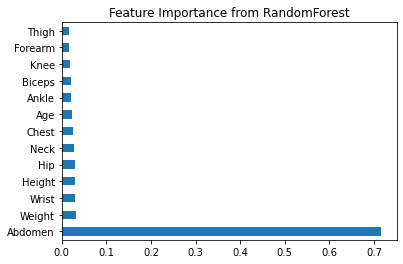

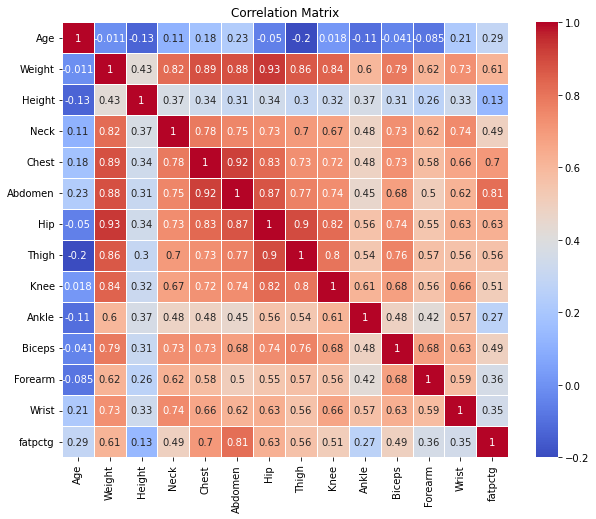

In [109]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

# Load the data
data = pd.read_csv('C:/Users/harsha/Desktop/DataMining_733/Homework3/BMI.csv')

# Separate features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Feature Importance from Tree-based models (e.g., RandomForest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance from RandomForest")
plt.show()

# Select features based on importance
sfm = SelectFromModel(rf_model, threshold='median')
sfm.fit(X_train, y_train)
selected_features = X_train.columns[sfm.get_support()]

# Method 2: Correlation-based feature selection
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Select features based on correlation threshold (e.g., 0.2)
correlation_threshold = 0.2
selected_features_corr = [col for col in correlation_matrix.columns if abs(correlation_matrix['fatpctg'][col]) > correlation_threshold]

# You can now use the selected features for further modeling

# Example: Use the selected features for modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Continue with your preferred modeling approach (e.g., linear regression, support vector machines, etc.)
# ...

# Evaluate your model and compare the results
# ...


In [110]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create an SVM regressor
svm_regressor = SVR()

# Fit the SVM model using the selected features from Random Forest
svm_regressor.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 30.21634398262012
R-squared (R2): 0.4445018557281698


In [111]:
# a) Wrapper method: 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize an empty set for selected features
selected_features_forward = []

# Create a linear regression model
model_forward = LinearRegression()

# Forward stepwise regression
for feature in X_train.columns:
    features_to_try = selected_features_forward + [feature]
    model_forward.fit(X_train[features_to_try], y_train)
    y_pred_forward = model_forward.predict(X_test[features_to_try])
    mse_forward = mean_squared_error(y_test, y_pred_forward)
    
    if not selected_features_forward or mse_forward < mse_forward_best:
        mse_forward_best = mse_forward
        selected_features_forward = features_to_try

print(f"Selected features (Forward Stepwise Regression): {selected_features_forward}")
print(f"Mean Squared Error (Forward Stepwise Regression): {mse_forward_best}")


Selected features (Forward Stepwise Regression): ['Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Forearm']
Mean Squared Error (Forward Stepwise Regression): 16.372596072683596


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model_backward = LinearRegression()

# Backward stepwise regression
selected_features_backward = list(X_train.columns)

while len(selected_features_backward) > 0:
    model_backward.fit(X_train[selected_features_backward], y_train)
    y_pred_backward = model_backward.predict(X_test[selected_features_backward])
    mse_backward = mean_squared_error(y_test, y_pred_backward)
    
    mse_without_feature = []

    for feature in selected_features_backward:
        features_to_try = [f for f in selected_features_backward if f != feature]
        model_backward.fit(X_train[features_to_try], y_train)
        y_pred_without_feature = model_backward.predict(X_test[features_to_try])
        mse_without_feature.append(mean_squared_error(y_test, y_pred_without_feature))

    mse_without_feature_min = min(mse_without_feature)

    if mse_without_feature_min < mse_backward:
        selected_features_backward.pop(mse_without_feature.index(mse_without_feature_min))
    else:
        break

print(f"Selected features (Backward Stepwise Regression): {selected_features_backward}")
print(f"Mean Squared Error (Backward Stepwise Regression): {mse_without_feature_min}")


Selected features (Backward Stepwise Regression): ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Forearm']
Mean Squared Error (Backward Stepwise Regression): 15.982010506241709


In [113]:
# b). Filter Method
import pandas as pd


# Separate features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Calculate correlation between input variables and output variable
correlation_with_output = X.apply(lambda x: x.corr(y))

# Sort features based on correlation
sorted_features = correlation_with_output.abs().sort_values(ascending=False)

# Output the ranking
print("Feature Ranking based on Correlation with Output:")
for feature, correlation in sorted_features.items():
    print(f"{feature}: {correlation}")


Feature Ranking based on Correlation with Output:
Abdomen: 0.8134322847810496
Chest: 0.7026203388938652
Hip: 0.6252009175086634
Weight: 0.6129250288075635
Thigh: 0.5596075319940892
Knee: 0.5086652428854685
Biceps: 0.49327112589161576
Neck: 0.4905918534410403
Forearm: 0.3613869031997191
Wrist: 0.3465748645265859
Age: 0.2914584401352218
Ankle: 0.2659697703063734
Height: 0.13321130513250504


# Embedded method
1. Lasso regression

In [114]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter

# Fit the model
lasso_model.fit(X_train_scaled, y_train)

# Get selected features based on non-zero coefficients
selected_features_lasso = X.columns[lasso_model.coef_ != 0]

# Print selected features
print("Selected features (Lasso Regression):", selected_features_lasso)


Selected features (Lasso Regression): Index(['Age', 'Weight', 'Height', 'Neck', 'Abdomen', 'Thigh', 'Biceps',
       'Forearm', 'Wrist'],
      dtype='object')


2. Random Forest

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort features based on importance
selected_features_rf = feature_importance_rf.sort_values(ascending=False).index

# Print selected features
print("Selected features (Random Forest):", selected_features_rf)


Selected features (Random Forest): Index(['Abdomen', 'Weight', 'Wrist', 'Height', 'Hip', 'Neck', 'Chest', 'Age',
       'Ankle', 'Biceps', 'Knee', 'Forearm', 'Thigh'],
      dtype='object')
